# Morphology of the Equatorial Ionosphere
#### By Amadi Brians C.
##### bamadi@brianspace.org

In [1]:
#=========== Import Packages ==============

import os
import glob
import shutil
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import cartopy.crs as ccrs
from netCDF4 import Dataset 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy.feature as cfeature
from netCDF4 import date2num, num2date
import matplotlib.gridspec as gridspec
from IPython.display import Video, display, HTML

import sys
import requests
import datetime
from urllib.parse import quote

#This user-defined package contains instruction for downloading
#download some files from zenodo, necessary to make 
#some plots such as magnetic equator, etc.
sys.path.append("..")  # path to your helper script folder
from utils.zenodo_tools import get_from_zenodo
from utils.get_dependencies import ensure_dependencies

In [2]:
#This code downloads the files and packages
#into a folder named dependencies
ensure_dependencies()

✔ convert_waccmx_datesec.py already exists. Skipping download.
✔ sha.py already exists. Skipping download.
✔ igrf13coeffs.txt already exists. Skipping download.
✔ mag2geo_all.csv already exists. Skipping download.


In [3]:
#Import User-defined packages and files downloaded
sys.path.append("..")  # adjust if needed
from dependencies.convert_waccmx_datesec import *   # or import specific functions
import dependencies.sha as sha

In [15]:
# ===== Read the magnetic equator file =====
BASE_DIR = os.getcwd()  # current working directory
mag2geo = os.path.join(BASE_DIR, "dependencies", "mag2geo_all.csv")
df2 = pd.read_csv(mag2geo, delim_whitespace = False, header = 0)

In [ ]:
# ===== File with WACCM-X EDens =====
wacx = Dataset('../data/WACCMX_subset.nc')

- ### What and where is the Equatorial Ionosphere?
  - First, the term **Equatorial** is derived from the latin word **aequator**, and it means to divide equally.
  - The anglicized form of **aequator** is **equator** and is used to describe the imaginary line dividing Earth (or other planets) into two equal parts; the Northern and Southern Hemispheres. The equator is represented by the bleck line shown in Figure 1.1

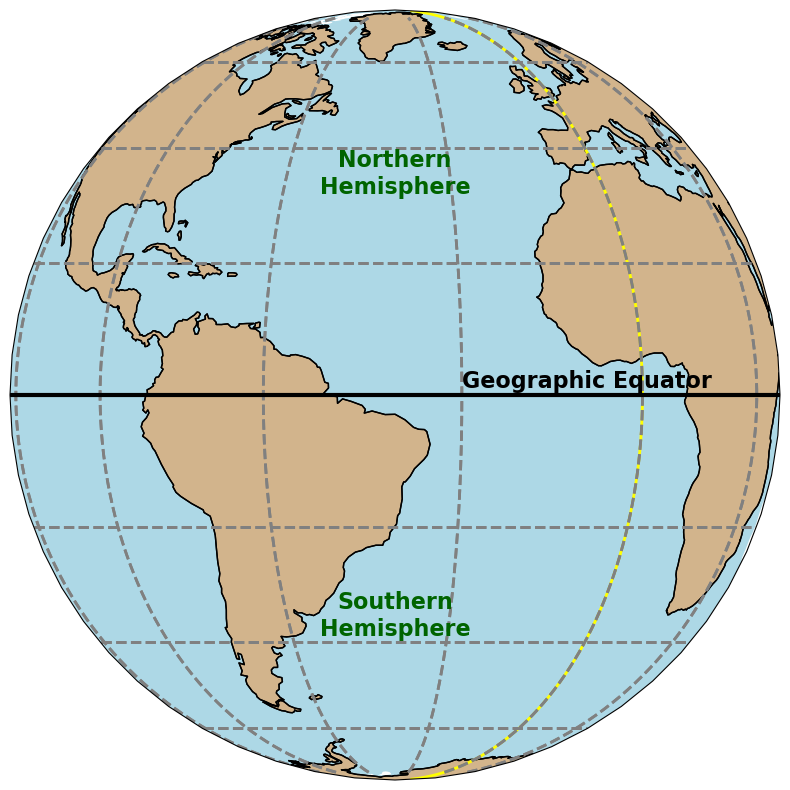

In [5]:
#=========== Geographic Equator ==============

fig = plt.figure(figsize=(20, 10))

# set central_latitude=0 so the equator appears straight across the centre
proj = ccrs.Orthographic(central_longitude=-40, central_latitude=0)
ax = fig.add_subplot(projection=proj)

# gridlines and coastlines
ax.gridlines(lw=2, color='gray', ls='--')
ax.coastlines()
ax.set_global()


# Add colored land and ocean
ax.add_feature(cfeature.LAND, facecolor='tan')      # land color
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # ocean color

# Draw coastlines on top
ax.coastlines(color='black', linewidth=1)

# Gridlines
ax.gridlines(lw=2, color='gray', ls='--')

# Equator: many longitudes at latitude = 0
lons = np.linspace(-180, 180, 721)
lats = np.zeros_like(lons)

# Equator
ax.plot(lons, np.zeros_like(lons),
        transform=ccrs.PlateCarree(),
        linewidth=3, color='black', label='Equator', zorder=10)

# Geo-Equator label
ax.text(-10, 2, "Geographic Equator",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

# Add a vertical line (meridian) dividing the globe into two hemispheres
latitudes = np.linspace(-90, 90, 200)
ax.plot([0]*len(latitudes), latitudes, color='yellow', linewidth=2, transform=ccrs.PlateCarree())

# Hemisphere labels (two lines each)
ax.text(-40, 35, "Northern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='darkgreen')

ax.text(-40, -35, "Southern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='darkgreen')

plt.show()


  - The region around the equator; specifically, $\pm 10^o$ (North and South), is said to be equatorial. Hence, the atmosphere over this region can be described equatorial as indicated by the yellow shaded region as shown by the yellow colored boundaries in Figure 1.2.

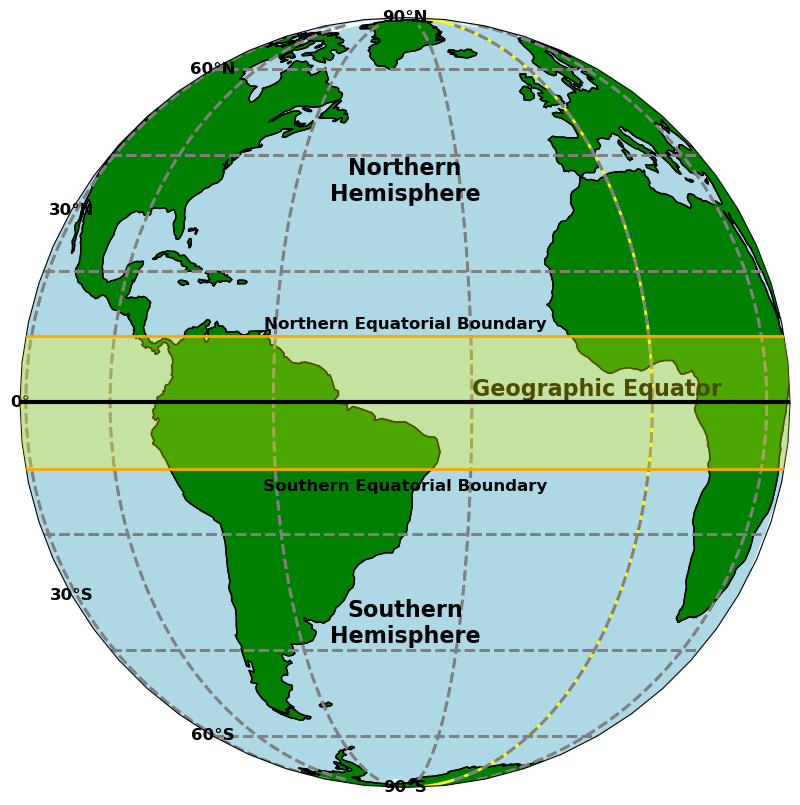

In [6]:
#=========== Equatorial Atmosphere ==============

fig = plt.figure(figsize=(20, 10))

# Orthographic projection
proj = ccrs.Orthographic(central_longitude=-40, central_latitude=0)
ax = fig.add_subplot(projection=proj)

# gridlines and coastlines
ax.gridlines(lw=2, color='gray', ls='--')
ax.coastlines()
ax.set_global()

# Add colored land and ocean
ax.add_feature(cfeature.LAND, facecolor='green')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Draw coastlines on top
ax.coastlines(color='black', linewidth=1)

# Gridlines
ax.gridlines(lw=2, color='gray', ls='--')

# Longitudes
lons = np.linspace(-180, 180, 721)

# Fill between Equatorial region
ax.fill_between(
    lons, -10, 10, 
    transform=ccrs.PlateCarree(),
    color='yellow', alpha=0.3, zorder=5
)

# Equator
ax.plot(lons, np.zeros_like(lons),
        transform=ccrs.PlateCarree(),
        linewidth=3, color='black', label='Equator', zorder=10)

# Northern Equatorial Boundary
ax.plot(lons, np.full_like(lons, 10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Southern Equatorial Boundary
ax.plot(lons, np.full_like(lons, -10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Meridian dividing hemispheres
latitudes = np.linspace(-90, 90, 200)
ax.plot([0]*len(latitudes), latitudes,
        color='yellow', linewidth=2, transform=ccrs.PlateCarree())

# Geo-Equator label
ax.text(-10, 2, "Geographic Equator",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

# Hemisphere labels
ax.text(-40, 35, "Northern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

ax.text(-40, -35, "Southern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

# Labels for tropics
ax.text(-40, 10.5, "Northern Equatorial Boundary",
        transform=ccrs.PlateCarree(),
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black')

ax.text(-40, -11.5, "Southern Equatorial Boundary",
        transform=ccrs.PlateCarree(),
        ha='center', va='top',
        fontsize=12, fontweight='bold', color='black')

# Latitude labels
latitudes = [0, 30, 60, 90, -30, -60, -90]
for lat in latitudes:
    ax.text(-130, lat, f"{abs(lat)}°{'N' if lat > 0 else ('S' if lat < 0 else '')}",
            transform=ccrs.PlateCarree(),
            ha='center', va='center',
            fontsize=12, fontweight='bold', color='black')

plt.show()


  - However, it is not right to describe the ionosphere over this region as Equatorial. Here is why:
    - The ionosphere is a region of weakly magnetized plasma that aligns with Earth's magnetic field and only knows about the **Geomagnetic equator**, and **not** the **Geographic equator** we have described in Figure 1.1. The **Geomagnetic equator** is represented by the red curvy line in Figure 1.3.

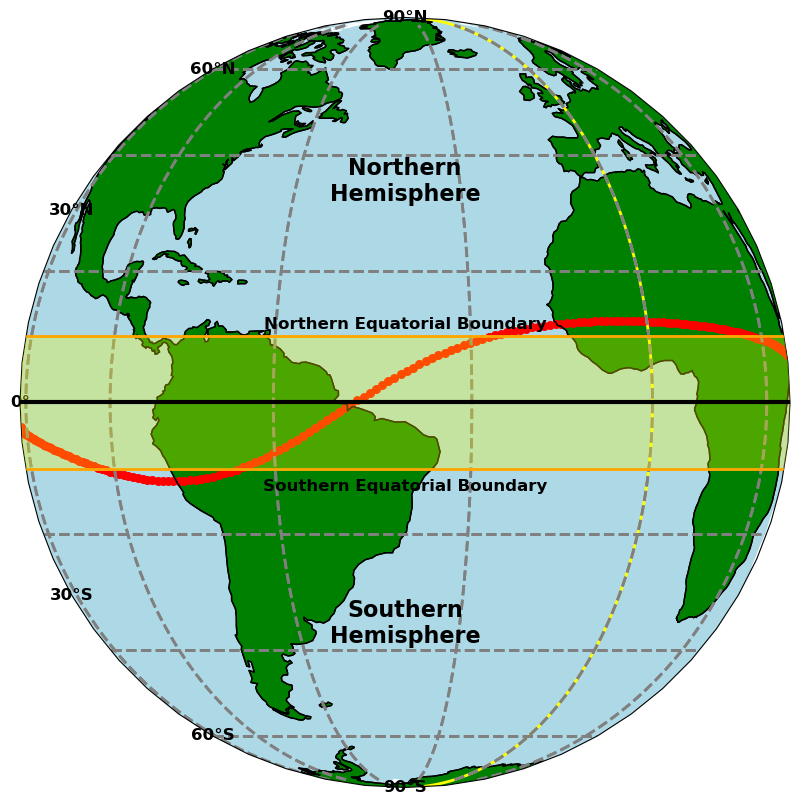

In [7]:
#=========== Geomagnetic Equator ==============

fig = plt.figure(figsize=(20, 10))

# Orthographic projection
proj = ccrs.Orthographic(central_longitude=-40, central_latitude=0)
ax = fig.add_subplot(projection=proj)

# gridlines and coastlines
ax.gridlines(lw=2, color='gray', ls='--')
ax.coastlines()
ax.set_global()

# Add colored land and ocean
ax.add_feature(cfeature.LAND, facecolor='green')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Draw coastlines on top
ax.coastlines(color='black', linewidth=1)

# Gridlines
ax.gridlines(lw=2, color='gray', ls='--')

# Longitudes
lons = np.linspace(-180, 180, 721)

# Fill between Tropic of Capricorn and Tropic of Cancer
ax.fill_between(
    lons, -10, 10, 
    transform=ccrs.PlateCarree(),
    color='yellow', alpha=0.3, zorder=5
)

# Equator
ax.plot(lons, np.zeros_like(lons),
        transform=ccrs.PlateCarree(),
        linewidth=3, color='black', label='Equator', zorder=10)

# Northern Equatorial Boundary
ax.plot(lons, np.full_like(lons, 10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Southern Equatorial Boundary
ax.plot(lons, np.full_like(lons, -10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Meridian dividing hemispheres
latitudes = np.linspace(-90, 90, 200)
ax.plot([0]*len(latitudes), latitudes,
        color='yellow', linewidth=2, transform=ccrs.PlateCarree())

# Hemisphere labels
ax.text(-40, 35, "Northern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

ax.text(-40, -35, "Southern\nHemisphere",
        transform=ccrs.PlateCarree(),
        ha='center', va='center',
        fontsize=16, fontweight='bold', color='black')

# Labels for tropics
ax.text(-40, 10.5, "Northern Equatorial Boundary",
        transform=ccrs.PlateCarree(),
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black')

ax.text(-40, -11.5, "Southern Equatorial Boundary",
        transform=ccrs.PlateCarree(),
        ha='center', va='top',
        fontsize=12, fontweight='bold', color='black')

# Latitude labels
latitudes = [0, 30, 60, 90, -30, -60, -90]
for lat in latitudes:
    ax.text(-130, lat, f"{abs(lat)}°{'N' if lat > 0 else ('S' if lat < 0 else '')}",
            transform=ccrs.PlateCarree(),
            ha='center', va='center',
            fontsize=12, fontweight='bold', color='black')

#Plot Magnetic Equator
size = 30
i = 0
ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)], transform=ccrs.PlateCarree(), 
           marker='o', color = 'r', s = size,)

plt.show()


- The equatorial ionosphere lies within about $\pm 15^o$ of the **Geomagnetic Equator** as shown in Figure 1.4. The curvy orange-shaded region is the **equatorial ionosphere**.

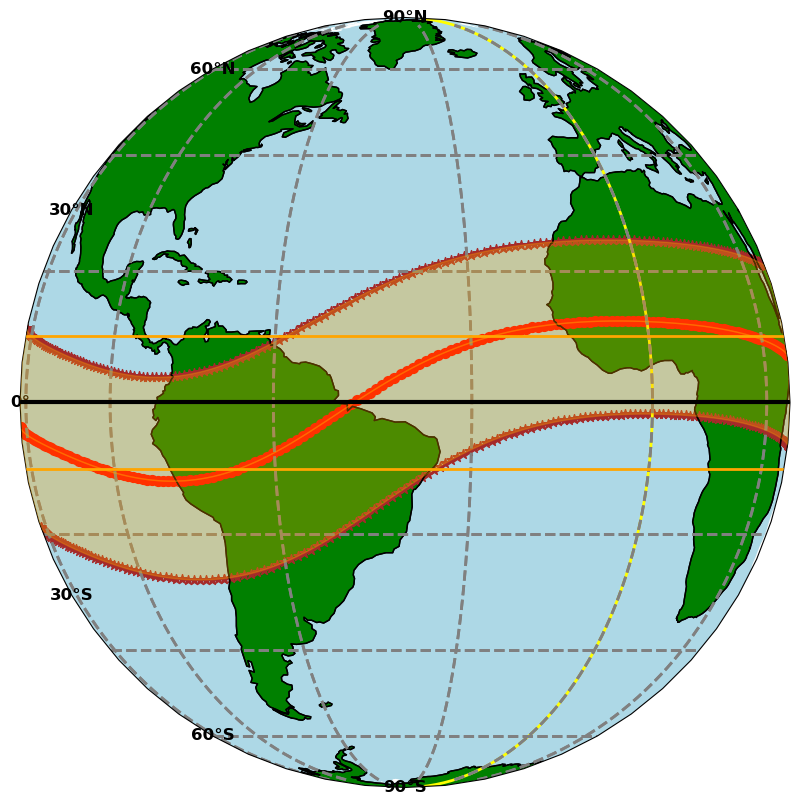

In [8]:
#=========== Equatorial Ionosphere ==============

fig = plt.figure(figsize=(20, 10))

# Orthographic projection
proj = ccrs.Orthographic(central_longitude=-40, central_latitude=0)
ax = fig.add_subplot(projection=proj)

# gridlines and coastlines
ax.gridlines(lw=2, color='gray', ls='--')
ax.coastlines()
ax.set_global()

# Add colored land and ocean
ax.add_feature(cfeature.LAND, facecolor='green')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Draw coastlines on top
ax.coastlines(color='black', linewidth=1)

# Gridlines
ax.gridlines(lw=2, color='gray', ls='--')

# Longitudes
lons = np.linspace(-180, 180, 721)

# Equator
ax.plot(lons, np.zeros_like(lons),
        transform=ccrs.PlateCarree(),
        linewidth=3, color='black', label='Equator', zorder=10)

# Northern Equatorial Boundary
ax.plot(lons, np.full_like(lons, 10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Southern Equatorial Boundary
ax.plot(lons, np.full_like(lons, -10),
        transform=ccrs.PlateCarree(),
        linewidth=2, color='orange', zorder=10)

# Meridian dividing hemispheres
latitudes = np.linspace(-90, 90, 200)
ax.plot([0]*len(latitudes), latitudes,
        color='yellow', linewidth=2, transform=ccrs.PlateCarree())


# Latitude labels
latitudes = [0, 30, 60, 90, -30, -60, -90]
for lat in latitudes:
    ax.text(-130, lat, f"{abs(lat)}°{'N' if lat > 0 else ('S' if lat < 0 else '')}",
            transform=ccrs.PlateCarree(),
            ha='center', va='center',
            fontsize=12, fontweight='bold', color='black')

# Plot Magnetic Latitudes
size = 50
for i in np.arange(-15, 16, 15):
    if i < 0:
        ax.scatter(df2['lon_minus_' + str(-1 * i)], df2['lat_minus_' + str(-1 * i)], transform=ccrs.PlateCarree(), 
                   marker='*', color = 'brown', s = size,)
    elif i == 0:
        ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)], transform=ccrs.PlateCarree(), 
                   marker='o', color = 'r', s = size,)
    else:
        ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)], transform=ccrs.PlateCarree(), 
                   marker='*', color = 'brown', s = size,)

# ---- Fill areas between consecutive lines ----
def fill_between_lines(lon_lower, lat_lower, lon_upper, lat_upper, color, alpha=0.3):
    # Sort points by longitude to avoid twisted polygons
    sort_idx_lower = np.argsort(lon_lower)
    sort_idx_upper = np.argsort(lon_upper)
    
    lon_lower_sorted = lon_lower.iloc[sort_idx_lower].values
    lat_lower_sorted = lat_lower.iloc[sort_idx_lower].values
    
    lon_upper_sorted = lon_upper.iloc[sort_idx_upper].values
    lat_upper_sorted = lat_upper.iloc[sort_idx_upper].values
    
    # Combine lower line + reversed upper line to form polygon
    poly_lons = np.concatenate([lon_lower_sorted, lon_upper_sorted[::-1]])
    poly_lats = np.concatenate([lat_lower_sorted, lat_upper_sorted[::-1]])
    
    ax.fill(poly_lons, poly_lats, transform=ccrs.PlateCarree(),
            color=color, alpha=alpha, zorder=5)

# Fill between -15 and 0
fill_between_lines(df2['lon_minus_15'], df2['lat_minus_15'],
                   df2['lon__0'], df2['lat__0'], color='orange', alpha=0.3)

# Fill between 0 and 15
fill_between_lines(df2['lon__0'], df2['lat__0'],
                   df2['lon__15'], df2['lat__15'], color='orange', alpha=0.3)
plt.show()


- ### Unique structure of EQI
  - The Equatorial Ionosphere exhibits a unique structure in terms of magnetic field orientation. In this region, **Earth's magnetic field is horizontal**. This implies that the **angle of dip or inclination is nearly or equal to zero**. Dip angle refers to as the angle between the magnetic field line and the horizontal (Earth's surface). Take note of this orientation because it has great impact on the behaviour of plasma in the region. We will talk about this subsequently.
  - Compare the blue horizontal line and magnetic field line orientation within the equatorial ionosphere. It is easy to see that magnetic field lines are horizontal within the equatorial ionosphere as shown in Figure 1.5.
  - This unique orientation in addition to other variables, make up the peculiar electrodynamics observed in the equatorial ionosphere. In the next segment, I will briefly discuss this variables.

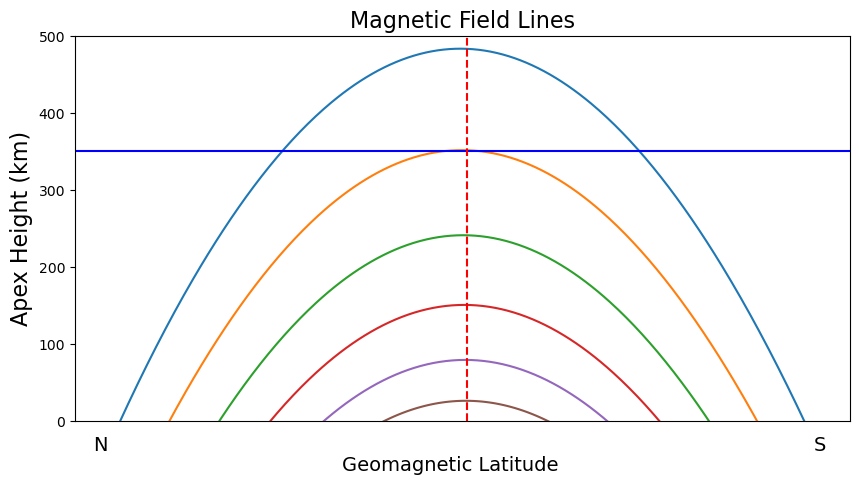

In [9]:
from field_lines import plot_field_lines

plot_field_lines(colat_range=(60, 80, 2), lon=125)

- Observe that the **angle of dip or inclination** increases as one moves away from the equator.

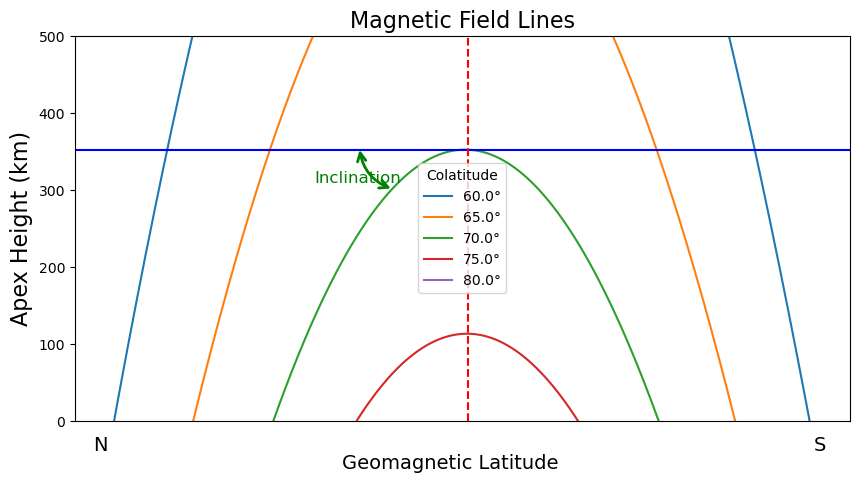

In [14]:
from field_lines import plot_field_lines_num

plot_field_lines_num(num_lines=5)

- Figure 1.6 shows a modeled ionosphere from the **Whole Atmosphere Community Climate Model with thermosphere and ionosphere eXtension (WACCM-X)** developed at the **National Center for Atmospheric Research (NCAR)** in Boulder, United States.
- Observe that the **intensity of plasma** around the **magnetic equator** is **higher** compared to other higher regions (latitudes). In subsequent conversation, the reason for this accumulation of plasma within this region will be explained.

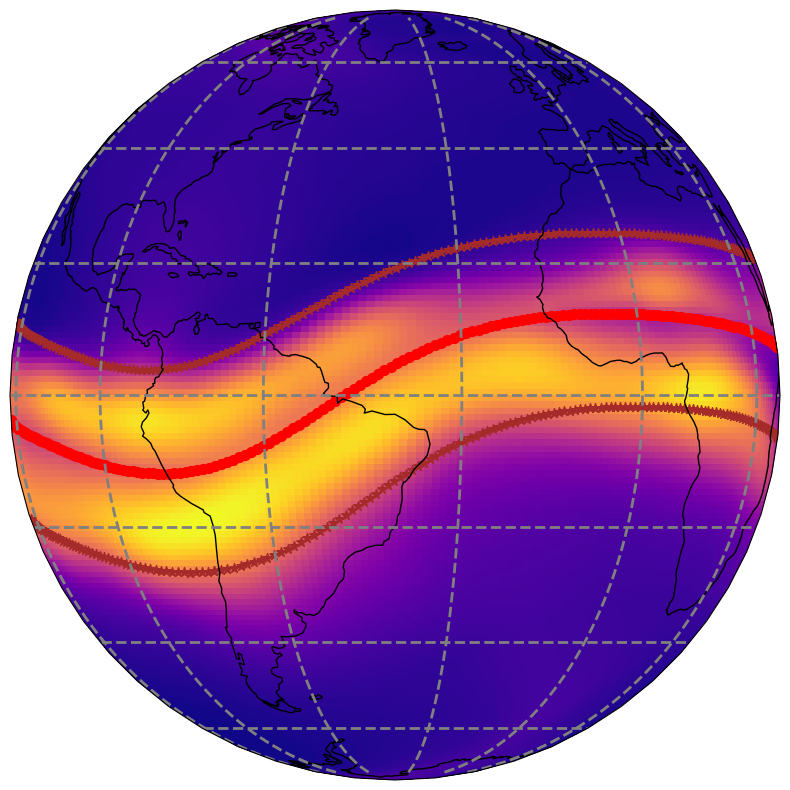

In [10]:
from shapely.geometry import Polygon

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection=ccrs.Orthographic(central_longitude = -40))
ax.gridlines(lw = 2, color = 'gray', ls = '--')

im = ax.pcolormesh(wacx['lon'][:],  wacx['lat'][:], wacx['EDens'][6, 12, :, :], 
                   transform=ccrs.PlateCarree(), cmap='plasma')

# Draw coastlines on top
ax.coastlines(color='black', linewidth=1)

size = 50
lines = [-15, 0, 15]  # i values

# Plot scatter points
for i in lines:
    if i < 0:
        ax.scatter(df2['lon_minus_' + str(-1 * i)], df2['lat_minus_' + str(-1 * i)],
                   transform=ccrs.PlateCarree(), marker='*', color='brown', s=size)
    elif i == 0:
        ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)],
                   transform=ccrs.PlateCarree(), marker='o', color='red', s=size)
    else:
        ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)],
                   transform=ccrs.PlateCarree(), marker='*', color='brown', s=size) 
    
plt.show()
